# Task: Build a classification model for predicting the income using the Adult Census Income Dataset.


## Load the dataset

Age: Age of the person

fnlwgt: Weighted tally of specified socio-economic characteristics of the population

education.num: Number of years of education

Occupation: Occupation of the person

race: The race of the person

hours.per.week: Number of working hours per week

Income: The income category of the person

workclass: Workclass of the person

Education: Education level of the person

marital.status: Marital status of the person

relationship: Relationship status of the person

sex: The person's sex (Male/Female)

native.country: The native country of the person

Check for null values and ? in any columns and handle those values. 

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv('adultcensusincome.csv')
print(df.shape)
df.sample(3)

(32561, 15)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
6041,61,Self-emp-not-inc,115023,Masters,14,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,4,?,<=50K
6653,53,Self-emp-not-inc,152652,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
29701,42,Self-emp-not-inc,248406,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [50]:
df.isnull().sum() # check for missing values

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [51]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True) # drop duplicates

24


In [52]:
for col in df.columns:
    num = (df[col] == '?').sum()
    print(f'Column "{col}" has {num} of "?" values')

Column "age" has 0 of "?" values
Column "workclass" has 1836 of "?" values
Column "fnlwgt" has 0 of "?" values
Column "education" has 0 of "?" values
Column "education.num" has 0 of "?" values
Column "marital.status" has 0 of "?" values
Column "occupation" has 1843 of "?" values
Column "relationship" has 0 of "?" values
Column "race" has 0 of "?" values
Column "sex" has 0 of "?" values
Column "capital.gain" has 0 of "?" values
Column "capital.loss" has 0 of "?" values
Column "hours.per.week" has 0 of "?" values
Column "native.country" has 582 of "?" values
Column "income" has 0 of "?" values


In [53]:
df = df[~df.isin(['?']).any(axis=1)] # filters data not containing '?'
df.reset_index(drop=True, inplace=True) # drop old index column and reset new index 
df.shape # new shape

(30139, 15)

## Check the distribution of target variable: Income and identify if the dataset is balanced.

In [54]:
income_dist = df['income'].value_counts()
print(income_dist)

income
<=50K    22633
>50K      7506
Name: count, dtype: int64


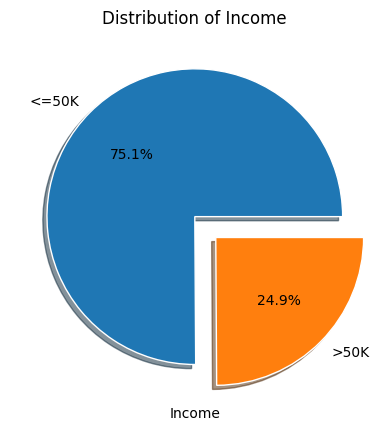

In [55]:
plt.pie(income_dist, labels=income_dist.index, autopct='%1.1f%%', explode=(0, 0.20), shadow=True, wedgeprops={'edgecolor': 'white'})
plt.title('Distribution of Income')
plt.style.use('default')
plt.xlabel("Income")
plt.subplot()
plt.show()

#### There is approximately a 3:1 ratio inbalance between income categories

# Perform the following Univariate analysis 
## Create a barplot for column income

Text(0, 0.5, 'Number of people')

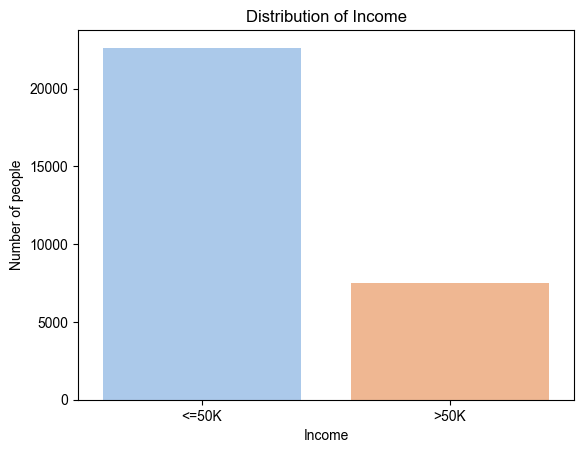

In [56]:
sns.countplot(data= df, x='income', palette='pastel')
plt.title('Distribution of Income')
plt.style.use('seaborn-v0_8')
plt.xlabel('Income')
plt.ylabel('Number of people')

## Create a distribution plot for column age

In [57]:
print(df['age'])

0        82
1        54
2        41
3        34
4        38
         ..
30134    22
30135    27
30136    40
30137    58
30138    22
Name: age, Length: 30139, dtype: int64


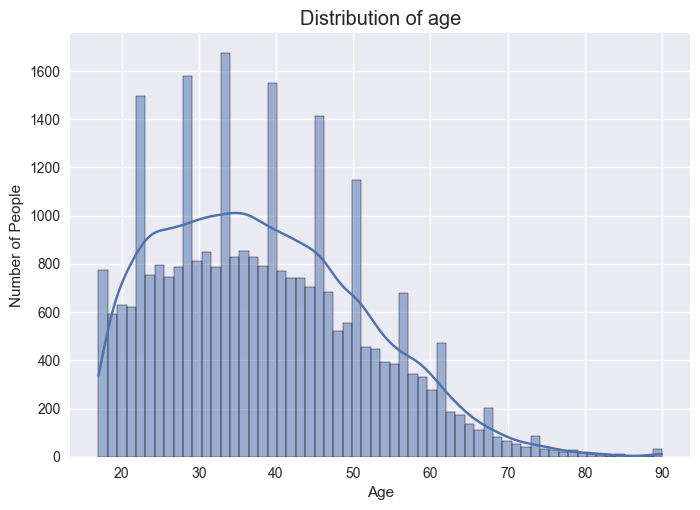

In [58]:
sns.histplot(df['age'], bins='auto', kde=True)
plt.style.use('ggplot')
plt.title("Distribution of age")
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.show()

#### Observation
There is a normal distribution of age with a right-skew

## Create a barplot for column education

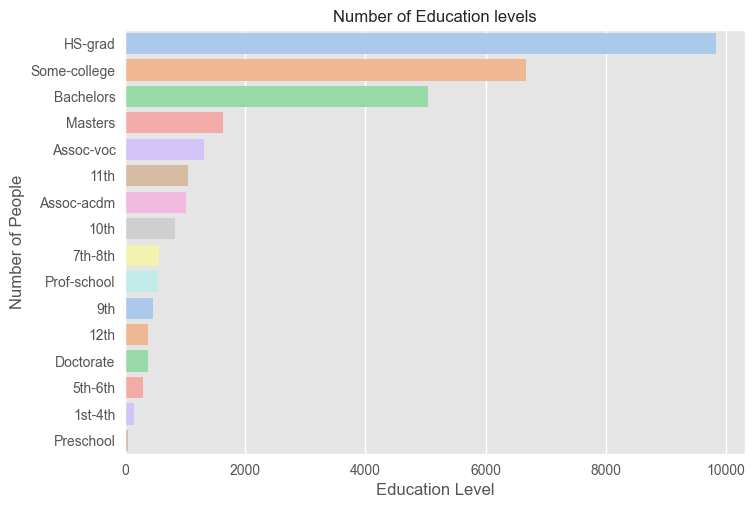

In [59]:
sns.countplot(data=df, y='education', order=df['education'].value_counts().index, palette='pastel')
plt.style.use('seaborn-v0_8')
plt.title('Number of Education levels')
plt.xlabel('Education Level')
plt.ylabel('Number of People')
plt.show()

#### Observation
Most census of education level is high school graduates

## Create a barplot for Years of Education. Use column education.num

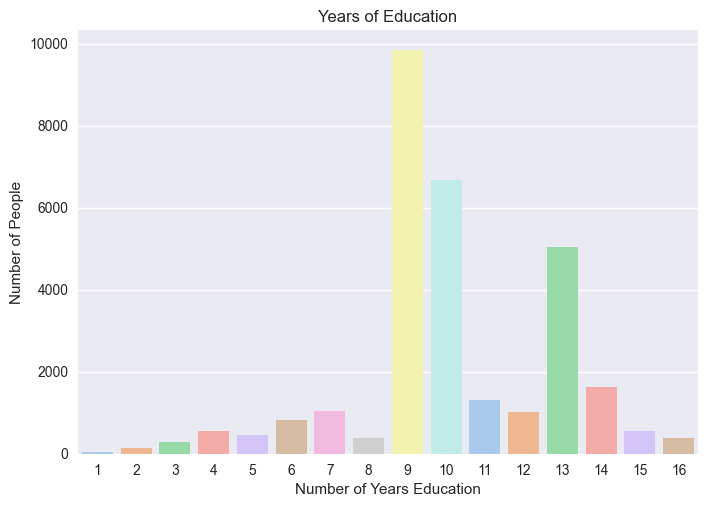

In [60]:
sns.countplot(data= df, x= 'education.num', palette='pastel')
plt.title('Years of Education')
plt.xlabel('Number of Years Education')
plt.ylabel('Number of People')
plt.style.use('seaborn-v0_8')

#### Observation
9 years of education is the most plentiful, followed by 10 year, then 13 years.

## Create a pie chart for Marital status. Use column marital.status

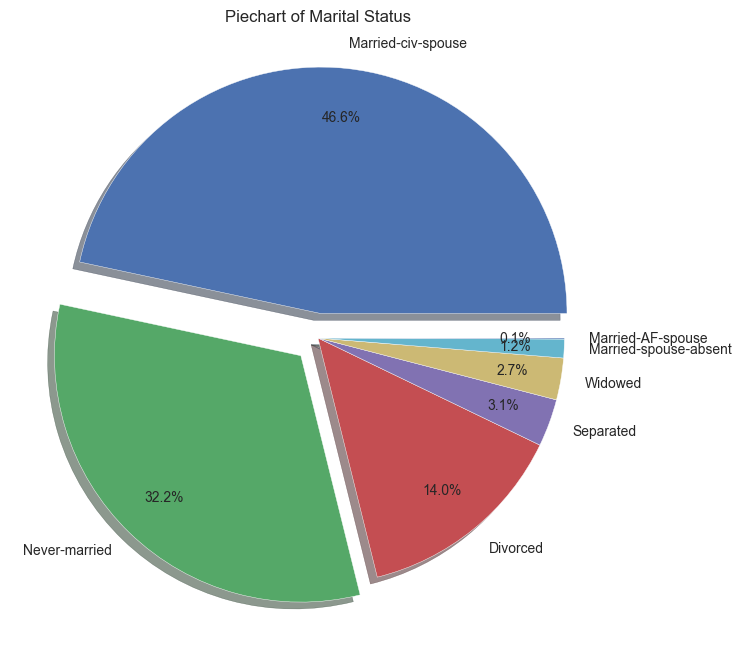

In [61]:
martial = df['marital.status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(martial, labels=martial.index,shadow=True, explode=(0.10, 0.10, 0, 0, 0, 0, 0), autopct='%1.1f%%', pctdistance=.8, wedgeprops={'edgecolor': 'white'})
plt.title('Piechart of Marital Status')
plt.show()

#### Observation
- Married with civial spouse was the most, followed by never-married, then divorced
- Least represented is people married with someone in Armed forces

# Perform the following Bivariate analysis
## Create a countplot of income across columns age, education, marital status, race, sex


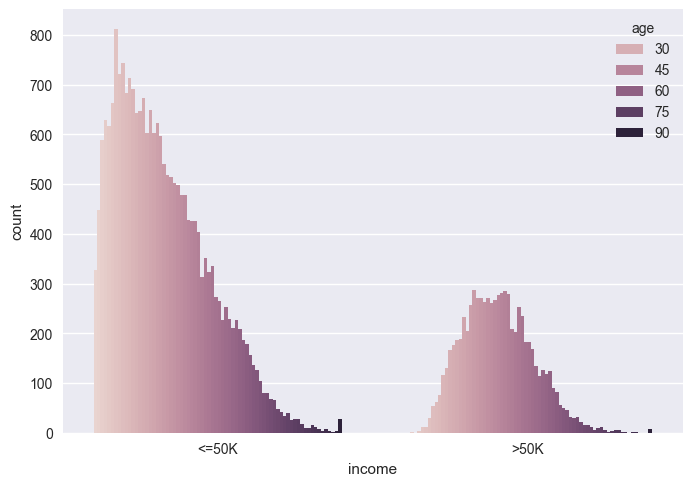

In [62]:
sns.countplot(data=df, x='income', hue='age')
plt.show()

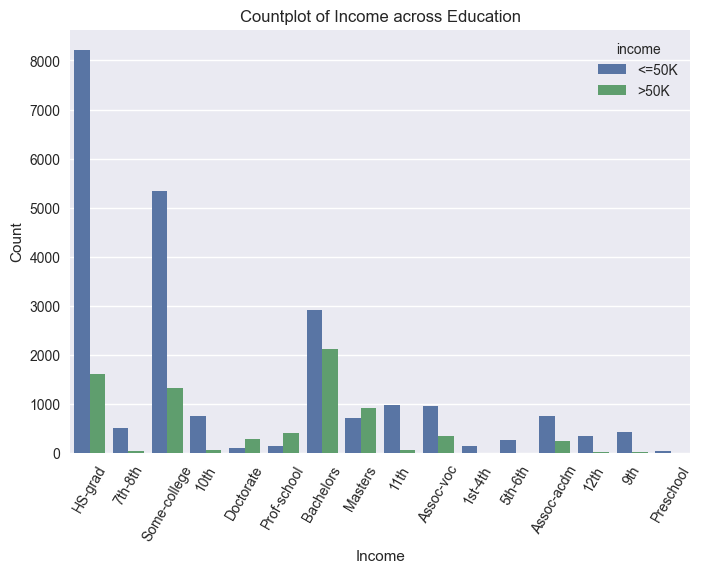

In [63]:
sns.countplot(data=df, x='education', hue='income')
plt.title('Countplot of Income across Education')
plt.xlabel('Income')
plt.xticks(rotation=60)
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

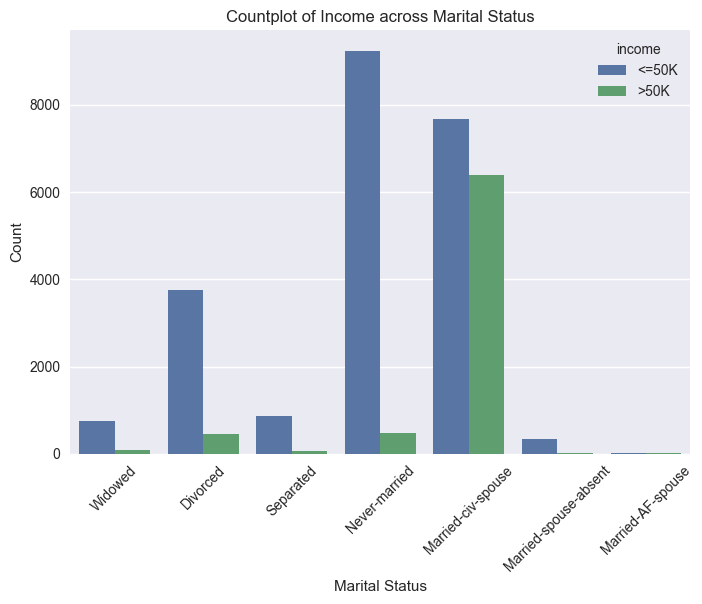

In [64]:
sns.countplot(data=df, x='marital.status', hue='income')
plt.title('Countplot of Income across Marital Status')
plt.xticks(rotation=45)
plt.xlabel('Marital Status')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

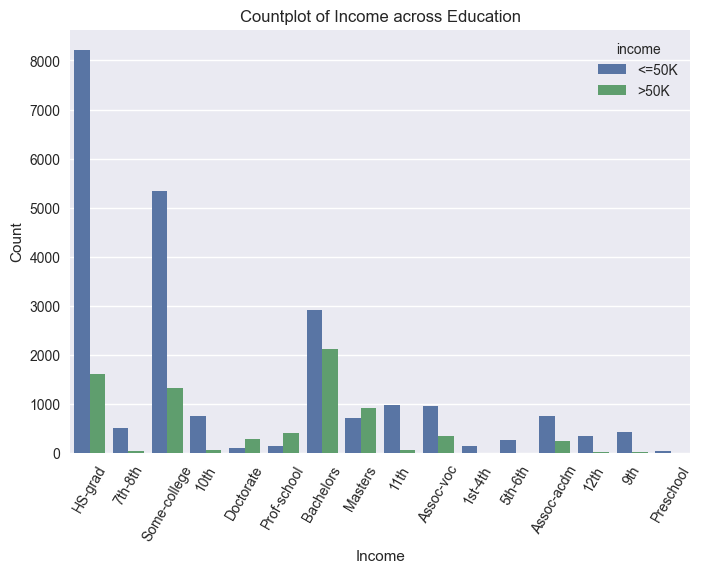

In [65]:
sns.countplot(data=df, x='education', hue='income')
plt.title('Countplot of Income across Education')
plt.xlabel('Income')
plt.xticks(rotation=60)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

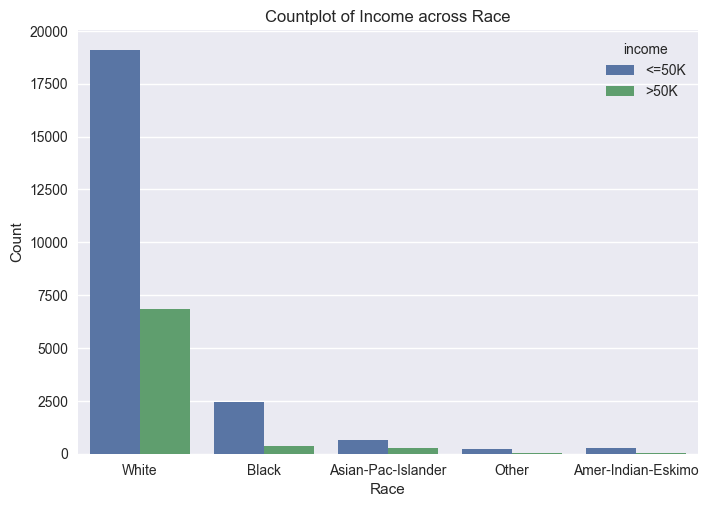

In [66]:
sns.countplot(data=df, x='race', hue='income')
plt.title('Countplot of Income across Race')
plt.xlabel('Race')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

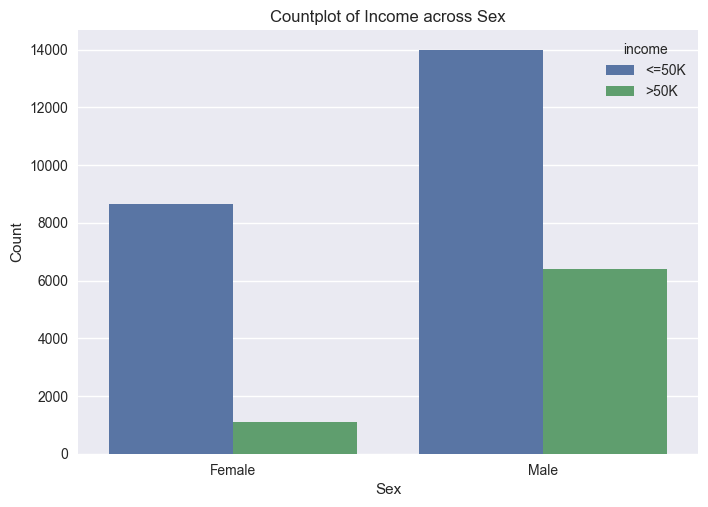

In [67]:
sns.countplot(data=df, x='sex', hue='income')
plt.title('Countplot of Income across Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

## Label encode all the categorical columns

In [68]:
cat = df.select_dtypes(include='object').columns

In [69]:
label_encoders = {}
for col in cat:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

## Draw a heatmap of data correlation and find out the columns to which income is highly correlated

<Axes: >

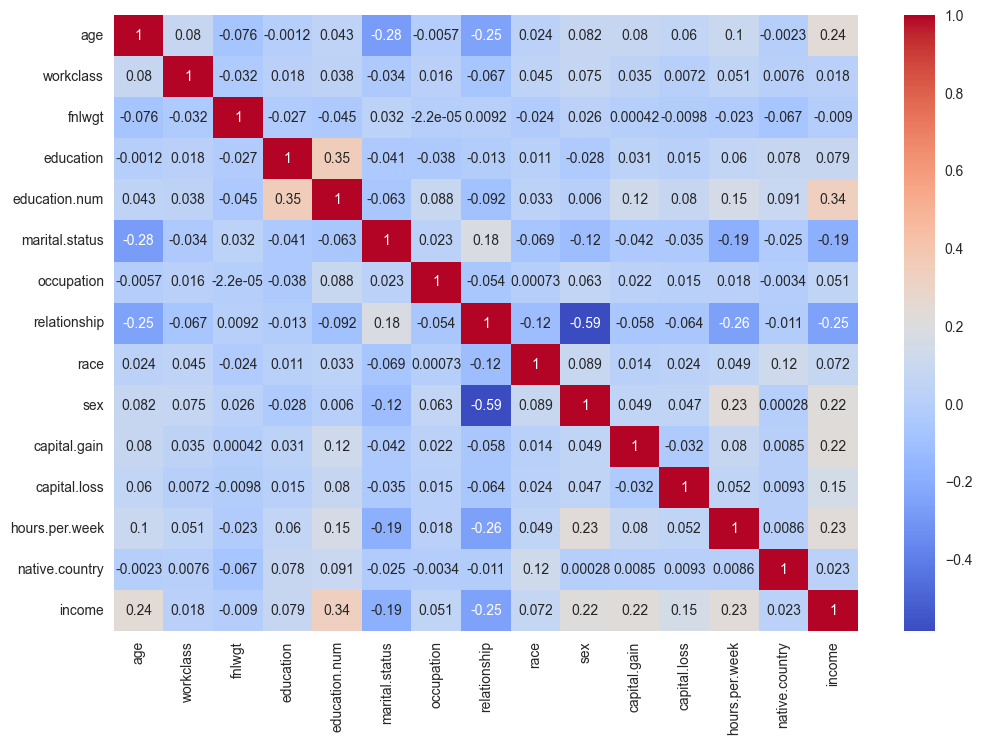

In [70]:
total_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(total_matrix, cmap='coolwarm', annot=True)

# Prepare the dataset for modeling
## Prepare independent variables X and dependent variable Y (Income). 

In [71]:
X = df.drop('income', axis=1)
y = df['income']

Perform a train test split in the ratio 80:20 and random_state 42.


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Perform feature scaling using StandardScaler and fix the imbalance in the dataset using any one of the techniques like SMOTE or RandomOverSampler


In [73]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

## Perform Data Modeling, Evaluate on Accuracy and F1 score, and identify the best model

Train Logistic Regression Model, KNN Classifier Model, SVM Classifier, Naive Bayes Classifier, Decision Tree Classifier and Random Forest Classifier


### Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train_smote, y_train_smote)

y_pred = log_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic f1 Score:", f1_score(y_test, y_pred))
log_class = log_model.classes_



Logistic Regression Accuracy: 0.7682481751824818
Logistic f1 Score: 0.6090120347047299


Confusion Matrix:
[[3543 1037]
 [ 360 1088]]


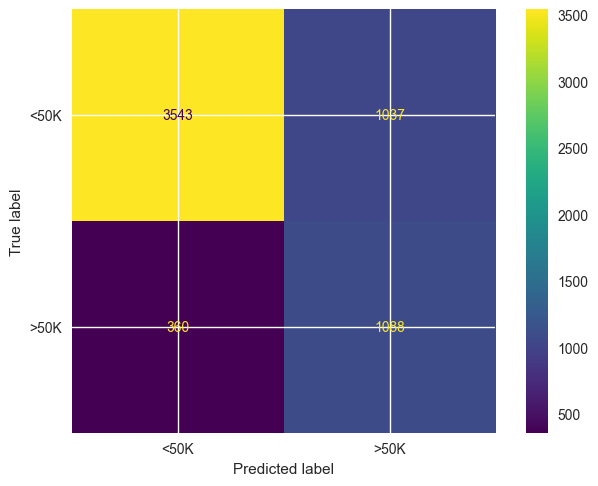

In [76]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["<50K", ">50K"])
# display matrix
cm_display.plot()
plt.show()

### Naive Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_smote, y_train_smote)

y_pred = nb_model.predict(X_test_scaled)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))
print("Naive Bayes f1 Score:", f1_score(y_test, y_pred))

Naive Bayes Accuracy: 0.8178500331785004
Naive Bayes f1 Score: 0.5660079051383399


Confusion Matrix:
[[4214  366]
 [ 732  716]]


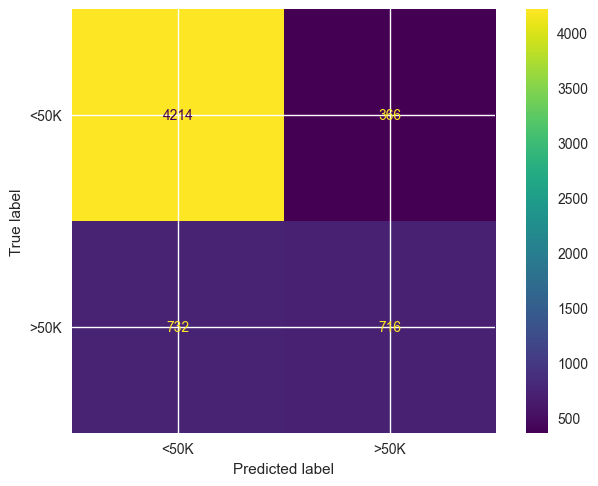

In [78]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["<50K", ">50K"])
# display matrix
cm_display.plot()
plt.show()

### KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_smote, y_train_smote)

y_pred = knn_model.predict(X_test_scaled)
print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("KNN f1 Score:", f1_score(y_test, y_pred))

KNN Accuracy: 0.7821831453218314
KNN f1 Score: 0.6179807972068665


Confusion Matrix:
[[3653  927]
 [ 386 1062]]


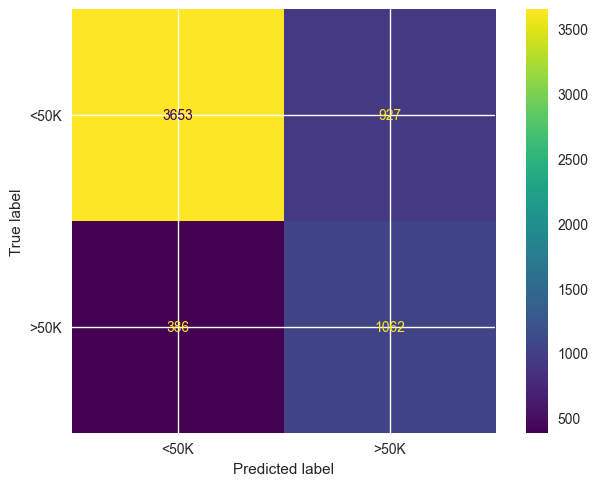

In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["<50K", ">50K"])
# display matrix
cm_display.plot()
plt.show()

### Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(X_train_smote, y_train_smote)

y_pred = dt_model.predict(X_test_scaled)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree f1 Score:", f1_score(y_test, y_pred))

Decision Tree Accuracy: 0.7617783676177837
Decision Tree f1 Score: 0.6399197592778335


Confusion Matrix:
[[3316 1264]
 [ 172 1276]]


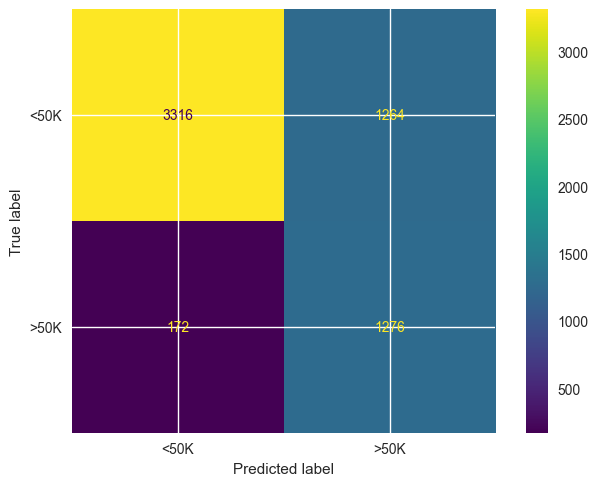

In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["<50K", ">50K"])
# display matrix
cm_display.plot()
plt.show()

### SVC

In [83]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train_smote, y_train_smote)

y_pred = svm_model.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("SVC f1 Score:", f1_score(y_test, y_pred))

SVM Accuracy: 0.7926343729263438
SVC f1 Score: 0.6612466124661247


Confusion Matrix:
[[3558 1022]
 [ 228 1220]]


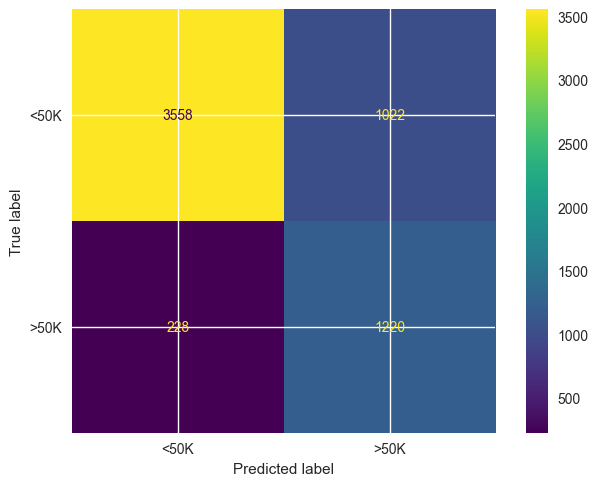

In [84]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["<50K", ">50K"])
# display matrix
cm_display.plot()
plt.show()

### Random Forest Classifier

In [85]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

y_pred = rf_model.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest f1 Score:", f1_score(y_test, y_pred))

Random Forest Accuracy: 0.843065693430657
Random Forest f1 Score: 0.6814814814814815


Confusion Matrix:
[[4070  510]
 [ 436 1012]]


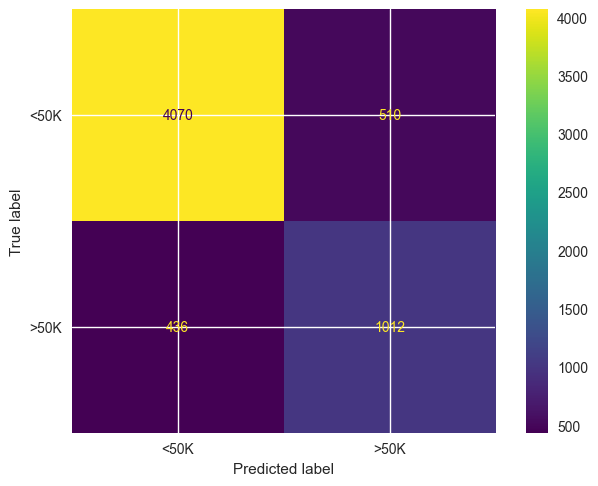

In [86]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["<50K", ">50K"])
# display matrix
cm_display.plot()
plt.show()

Experiment with hyperparameters if time permits


 Logistic Regression Performance 
Accuracy: 0.7906
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.87      4580
           1       0.65      0.28      0.39      1448

    accuracy                           0.79      6028
   macro avg       0.73      0.62      0.63      6028
weighted avg       0.77      0.79      0.76      6028


 KNN Performance 
Accuracy: 0.7686
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86      4580
           1       0.53      0.32      0.40      1448

    accuracy                           0.77      6028
   macro avg       0.67      0.62      0.63      6028
weighted avg       0.74      0.77      0.75      6028


 Naïve Bayes Performance 
Accuracy: 0.7910
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.87      4580
           1       0.64      0.29

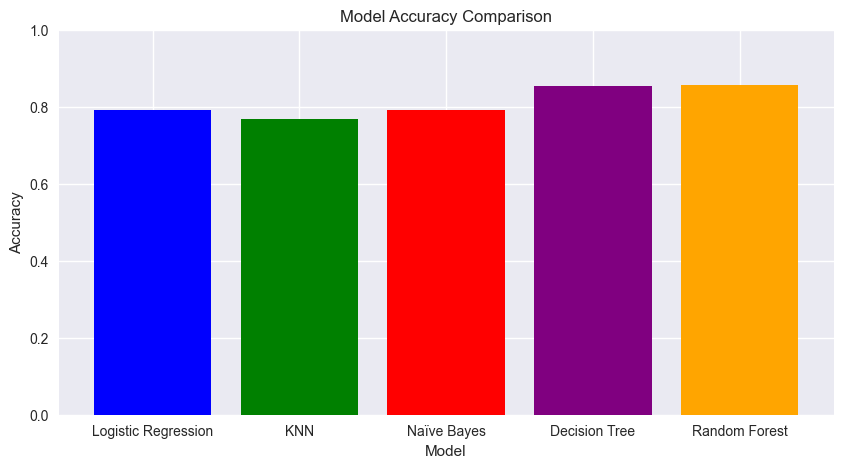

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=199; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=199

In [87]:
from sklearn.metrics import classification_report
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    # "SVM": SVC(kernel='rbf', probability=True),
    "Naïve Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    f1 = f1_score(y_test, y_pred)
    results[name] = accuracy  # Store accuracy

    print(f"\n {name} Performance ")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple', 'orange', 'black'])
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

from scipy.stats import randint
param_dist = { 'n_estimators': randint(100, 500), 'max_depth': [None, 10, 20, 30, 40], 'min_samples_split': randint(2, 10), 'min_samples_leaf': randint(1, 5), 'max_features': ['auto', 'sqrt'] } 
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), 
param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1, verbose=2, random_state=42) 
random_search.fit(X_train, y_train) 
print("Best Parameters:", random_search.best_params_)

Random Forest Accuracy: 0.8432315859323158
Random Forest f1 Score: 0.6846846846846847
Confusion Matrix:
[[4057  523]
 [ 422 1026]]


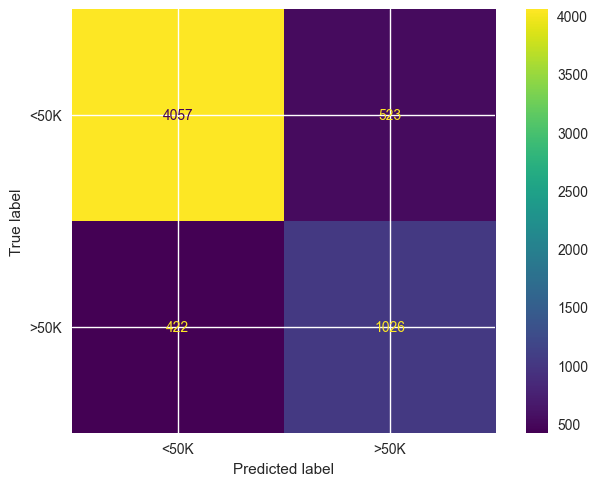

In [88]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=40, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=158)
rf_model.fit(X_train_smote, y_train_smote)

y_pred = rf_model.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest f1 Score:", f1_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["<50K", ">50K"])
# display matrix
cm_display.plot()
plt.show()


In [89]:
# Perform Grid Search CV for hyperparameter tuning
param_grid = { 'n_estimators': [100, 200, 300], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt'] }
grid_search = GridSearchCV(model, param_grid, scoring="accuracy", cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)
best_tuned_model = model.set_params(**best_params)
best_tuned_model.fit(X_train, y_train)

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best Accuracy Score: 0.8610179190287655


RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=300)

# Conclusion
- Randomforest classifer yielded the best accuracy of ~86% with hyperparameter tuning